In [114]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import seaborn as sns
sns.set()

In [115]:
def Steinhart_Hart(x,a,b,c,d):
    constant = -273.15
    return 1/(a+b*np.log(x)+c*np.log(x)**2+d*np.log(x)**3) + constant
def Shockley(x,I,t):
    # fit for saturation current and temperature
    q = 1.6*10**(-19)  # electric charge in Coloumbs
    k = 1.3807*10**(-23) # Boltzman Constant in Joules
    
def chi_square_red(x, y, yerr, modelfunc, p_opt):
    # Reduced Chi Squared Reading. It Outputs value for accuracy of Fit. Should be near 1
    numerator = (y - modelfunc(x, *p_opt)) ** 2
    denominator = yerr ** 2
    chi = sum(numerator / denominator)
    chired = chi / (len(y) - len(p_opt))
    return chired
def fitting(function,xdata,ydata,  guess,sigma = 0):
    if type(sigma) is int:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess)
    else:
        fit_opt, fit_cov = curve_fit(function,xdata,ydata, p0=guess, sigma = sigma, absolute_sigma = True)
    return function(np.linspace(np.min(xdata), np.max(xdata),20),*fit_opt), fit_opt, fit_cov 


In [116]:
## Load in Thermistor Data. First Column in Temperature in C, then 3 resistance readings in Ohms
thermo_data = np.loadtxt('thermistor.csv', delimiter=',', usecols=(0,1,2,3), unpack=True)

In [117]:
### Data Manipulation 
temp = thermo_data[0]+273.15  # Convert to Kelvin
resist = np.mean(thermo_data[1:3], 0)   # average each 3 resistance values

In [118]:
yerr = np.repeat(3,len(temp))
xerr = np.repeat(0.01, len(resist))

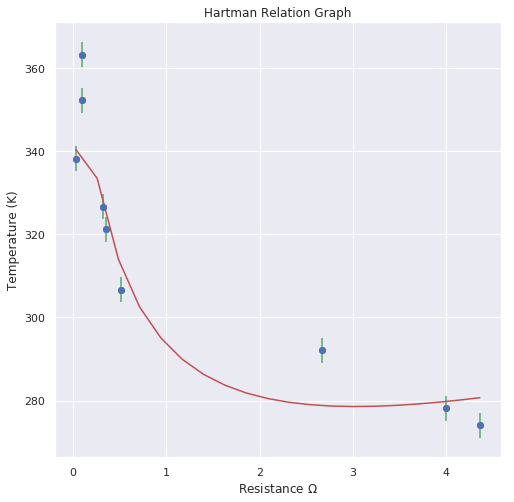

In [120]:
plt.figure(figsize = (8,8))
plt.scatter(resist, temp) 
init = (3.4*10**-3, 2*10**-4, 0.79*10**-4, 6.53*10**-5)
fit = fitting(Steinhart_Hart,resist,temp,guess =init, sigma = yerr)
plt.plot(np.linspace(np.min(resist), np.max(resist),20),fit[0], c = 'r')
plt.errorbar(resist, temp, yerr=yerr, xerr=xerr, fmt='o', ecolor='g', capthick=2)
plt.title('Hartman Relation Graph')
plt.xlabel(r'Resistance $\Omega$')
plt.ylabel('Temperature (K)')
perr = np.sqrt(np.diag(fit[2]))


In [121]:
print('Coefficents ', fit[1] )
print('errors', perr )
print(chi_square_red(resist,temp, yerr,Stinehart_Hart, fit[1]))

Coefficents  [ 1.76438858e-03  7.58599758e-05 -1.95326461e-05 -8.85917967e-06]
errors [7.21746779e-06 3.36427404e-06 3.78538275e-06 1.16594789e-06]
7.843820387641758


In [124]:
resistance = float(input("What Did the Ohmmeter Say? "))
temp_val = Steinhart_Hart(resistance, *fit[1])
print('Your Temperature ' + np.str(np.round(temp_val,2)) + ' K!')

What Did the Ohmmeter Say? 2.0
Your Temperature 280.98 K!


### DIODE CODE

In [139]:
diode_data = np.loadtxt('forward_diode.csv', delimiter=',', usecols=(0,1), unpack=True)

In [140]:
current = diode_data[0]/1000 # convert from milli to normal
voltage = diode_data[1]
yerr = np.repeat(0.5/1000,len(current))

In [141]:
def Shockley_Diode(V,a,b):
    charge = 0.16*10**-19
    return a*np.exp(charge*V/b)

Text(0.5, 0, 'Voltage')

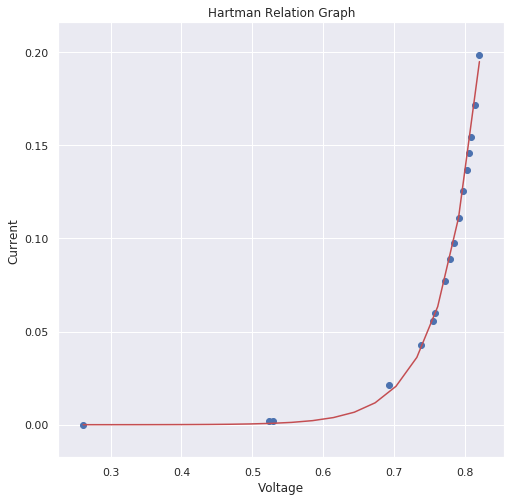

In [142]:
plt.figure(figsize = (8,8))
plt.scatter(voltage,current)
init = (100, 10*10**-19)
fit = fitting(Shockley_Diode,voltage,current,guess =init, sigma = yerr)
plt.plot(np.linspace(np.min(voltage), np.max(voltage),20), fit[0], c = 'r')
plt.title('Hartman Relation Graph')
plt.ylabel('Current')
plt.xlabel('Voltage')

In [143]:
diode_data = np.loadtxt('backward_diode.csv', delimiter=',', usecols=(0,1), unpack=True)

In [144]:
current = diode_data[0]/1000 # convert from milli to normal
voltage = diode_data[1]
yerr = np.repeat(0.005/1000,len(current))

Text(0.5, 0, 'Voltage')

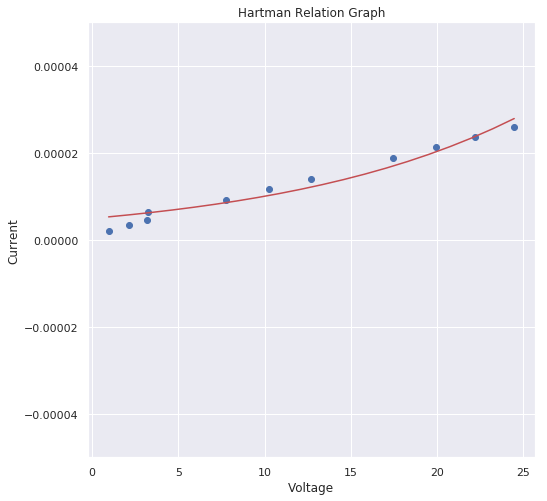

In [153]:
plt.figure(figsize = (8,8))
plt.scatter(voltage,current)
plt.ylim(-0.00005,0.00005)
init = (.1, 10*10**-20)
fit = fitting(Shockley_Diode,voltage,current,guess =init, sigma = yerr)
plt.plot(np.linspace(np.min(voltage), np.max(voltage),20), fit[0], c = 'r')
plt.title('Hartman Relation Graph')
plt.ylabel('Current')
plt.xlabel('Voltage')